Oblig 7

1. Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

2. Plot this metric while increasing the number of clusters, e.g.,  𝑘=2..30  (see here for an example).

3. Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [26]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.decomposition import PCA

In [27]:
schrooms = pd.read_csv('agaricus-lepiota.data')
schrooms.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1. Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

In [28]:
dummies = pd.get_dummies(schrooms.drop('edibility', axis='columns'))

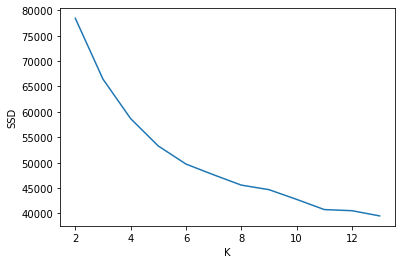

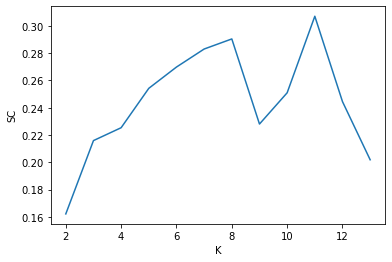

In [56]:


ssd = []
sc = []
k = range(2, 14)
for n in k:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(dummies)
    ssd.append(kmeans.inertia_)
    sc.append(metrics.silhouette_score(dummies.values, kmeans.labels_, metric='euclidean'))
    
plt.xlabel('K')
plt.ylabel('SSD')
plt.plot(k, ssd)
plt.figure(2)
plt.xlabel('K')
plt.ylabel('SC')
plt.plot(k, sc)

10 clusters looks appropriate according to the graph

2. Plot this metric while increasing the number of clusters, e.g., 𝑘=2..30 (see here for an example).

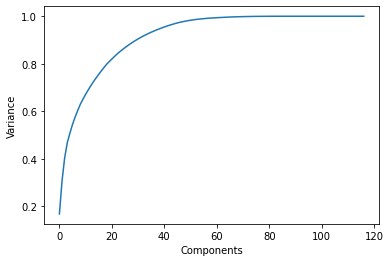

In [63]:
pca = PCA()
pca.fit(dummies)

plt.plot(range(0,117), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

In [64]:
pca_transform = pca.fit_transform(dummies)

Redusert antall features: 117


3. Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [ ]:
figure, axs = plt.subplots(2,3)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.4)
for i in range(2,7):
    k = i+1
    x = int((i-1)/3)
    y = ((i-1)%3)
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    Ypreds = kmeans.fit_predict(pca)
    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(df_pca[Ypreds == 0, 0], df_pca[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
    axs[x, y].scatter(df_pca[Ypreds == 1, 0], df_pca[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.show()